# Соревнование на kaggle

---

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Загрузка данных

In [114]:
df_train = pd.read_csv('./train.csv')
df_train.iloc[np.random.choice(len(df_train), 10, replace=False)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2351,10,24.00,226.55,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
3367,28,96.60,2684.35,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Credit card (automatic),0
2070,23,19.80,465.45,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1581,48,34.70,1604.5,Female,0,Yes,No,No,No phone service,DSL,No,Yes,Yes,No,No,No,One year,No,Mailed check,1
3809,34,20.65,716.4,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1131,65,67.05,4309.55,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,One year,No,Credit card (automatic),0
3416,72,115.80,8332.15,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
3955,45,62.70,2791.5,Male,1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Credit card (automatic),1
4559,27,80.65,2209.75,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),0
2331,2,75.55,166.3,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [115]:
df_train.info() # нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [116]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Анализ данных

Почему-то колонка `TotalSpent` имеет тип данных `object`, надо ее прикастить к флотам. В том числе нулевые значения, которые в колонке представлены пустыми строками. Затем можно уже посмотреть на распределение численных признаков

In [117]:
print(df_train[num_cols].loc[df_train['TotalSpent'] == ' '])
df_train['TotalSpent'] = df_train['TotalSpent'].replace(' ', 0).astype('float64')

      ClientPeriod  MonthlySpending TotalSpent
1048             0            25.75           
1707             0            73.35           
2543             0            19.70           
3078             0            80.85           
3697             0            20.00           
4002             0            61.90           
4326             0            25.35           
4551             0            52.55           
4598             0            56.05           


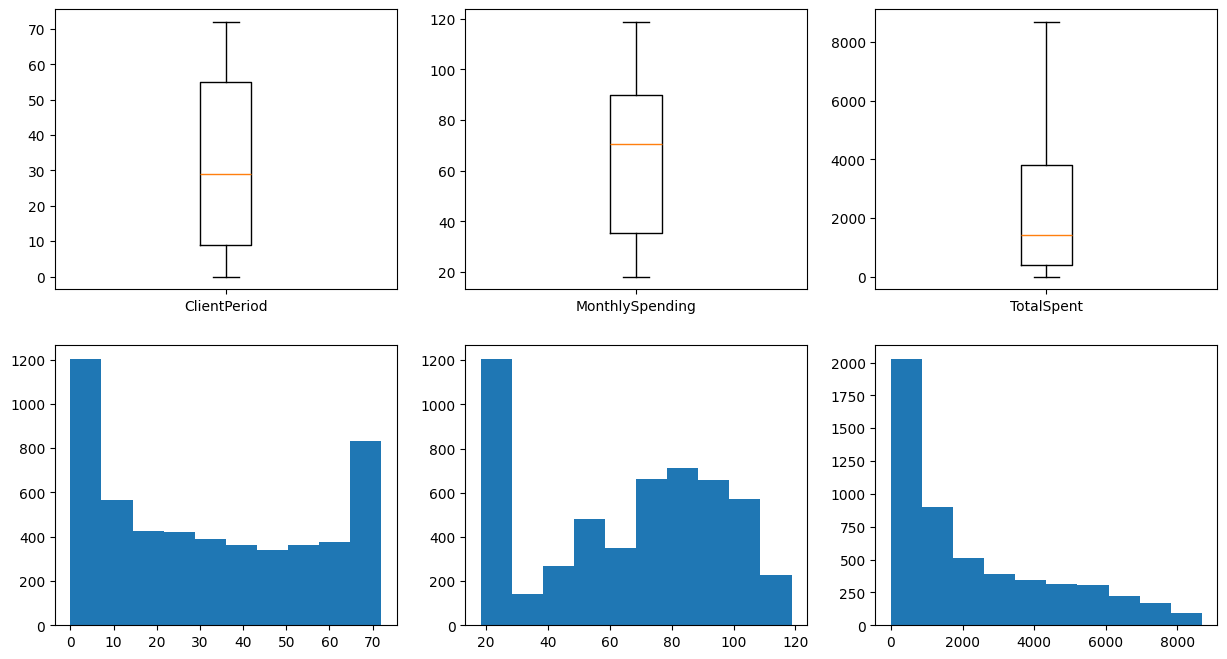

In [118]:
axes = plt.figure(figsize=(15, 8)).subplots(2, 3)

for i, col in enumerate(num_cols):
    axes[0, i].boxplot(df_train[col], labels=[col])
    axes[1, i].hist(df_train[col])

In [119]:
from sklearn.metrics import mean_absolute_percentage_error as mape

totalSpent = df_train['ClientPeriod'] * df_train['MonthlySpending']
print(f"Mean deviation: {mape(df_train['TotalSpent'], totalSpent):.2%}\nCorrelation: {df_train['TotalSpent'].corr(totalSpent):.2%}")

Mean deviation: 3.19%
Correlation: 99.96%


Как видим, выбросов нет, только среди значений `TotalSpent` есть довольно большие значения, поскольку эта колонка примерно равняется произведению `ClientPeriod` и `MonthlySpending`. Возможно, имеет смысл попробовать убрать эту колонку.

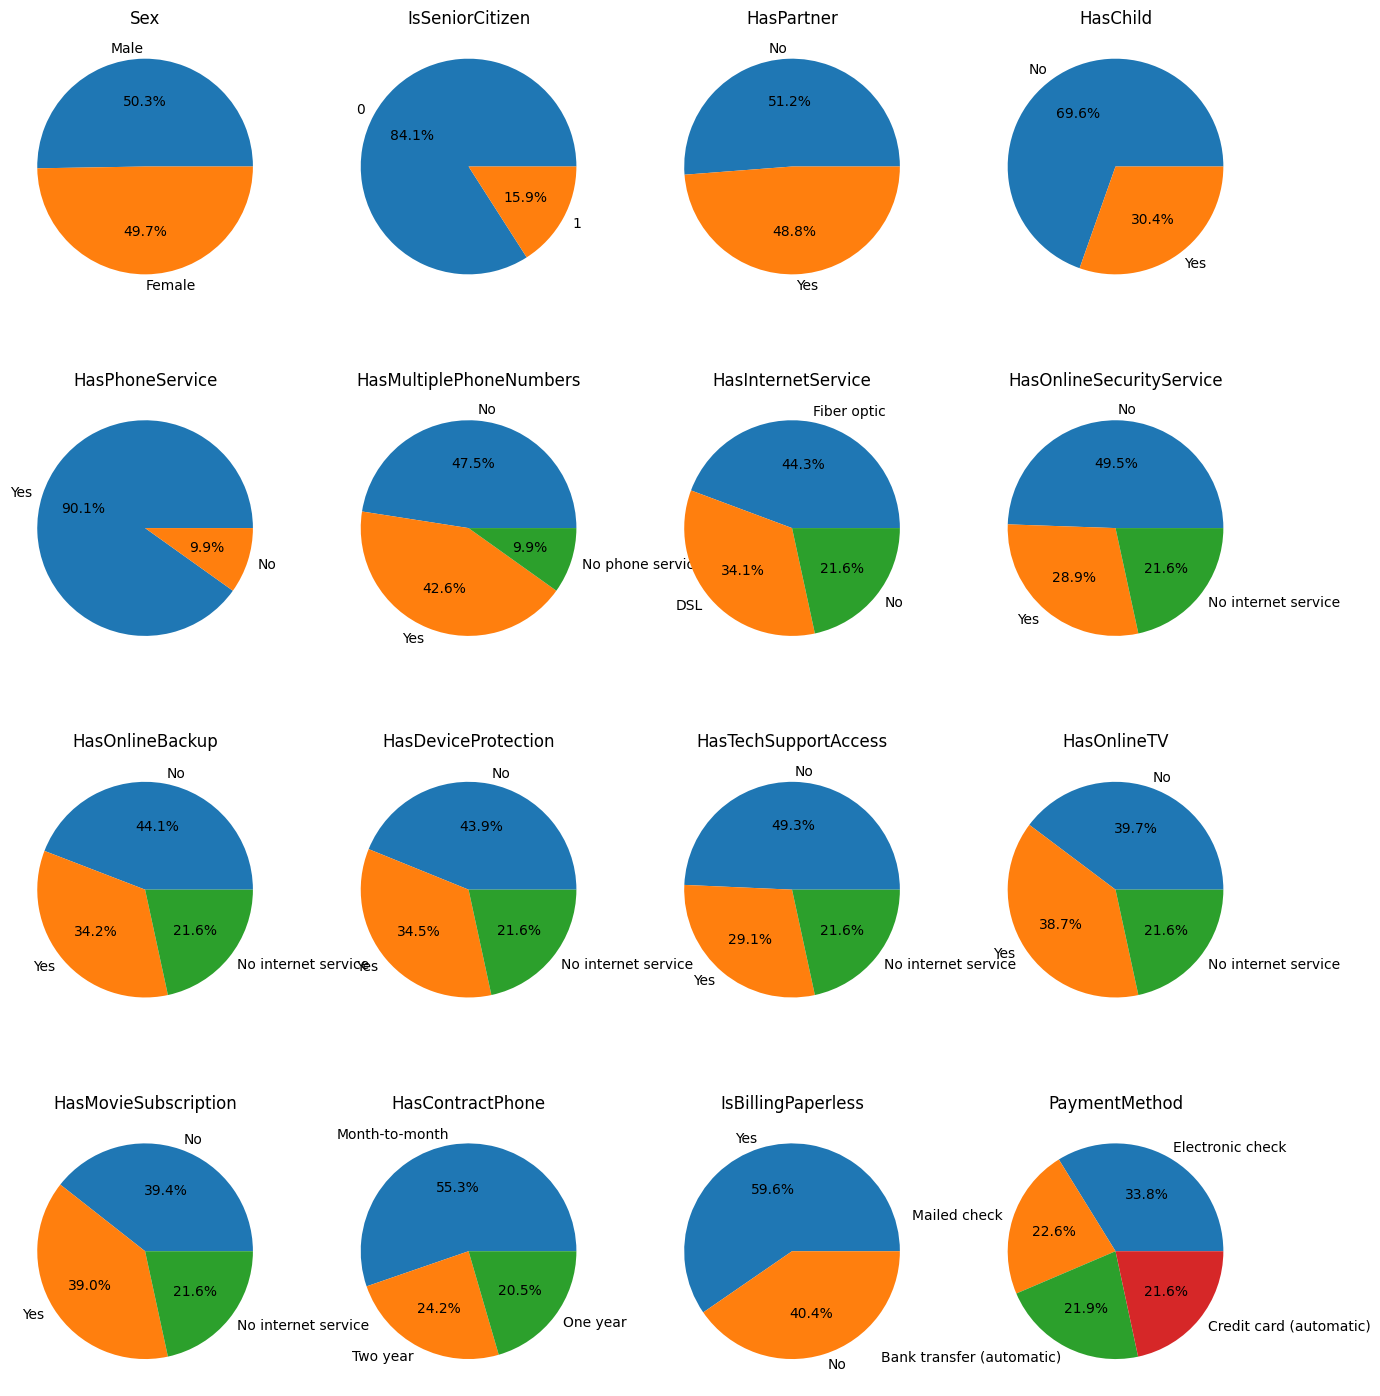

In [122]:
axes = plt.figure(figsize=(16, 18)).subplots(4, 4)
plt.pie
for i, col in enumerate(cat_cols):
    distr = df_train[col].value_counts()
    axes[i // 4, i % 4].pie(distr.values, labels=distr.keys(), autopct='%1.1f%%')
    axes[i // 4, i % 4].set(title=col)

Можно заметить, что столбцы `HasPhoneService` и `HasInternetService` выделяются. Если какой-то представитель датасета не подключен к какому-то с этих сервисов, то во всех соответсвующих аттрибутам сервиса столбцах стоит значение `No phone service` или `No internet service` соответственно. Таким образом одна и та же информация содержится в разных столбцах. Особенно это неприятно при энкодинге категориальных фичей. Хотелось бы это как-то решить, например:
- Удалить всех представителей, не подключенных к сервисам. Здесь очевидный минус в том, что мы потеряем возможно значительную информацию и 20-30% датасета.
- Заменить значения `No _ service` на `No`, будто у представителя не подключены все эти сервисы. Минус в том, что мы не знаем заранее, какие сервисы бы подключил пользователь, если бы у него была возможность.
- Заменить значения `No _ service` на `No` и `Yes` случайно пропорционально отношению количества уже имеющихся `Yes` и `No`. Вероятно, это тоже не идеальное решение, но попробовать можно. 

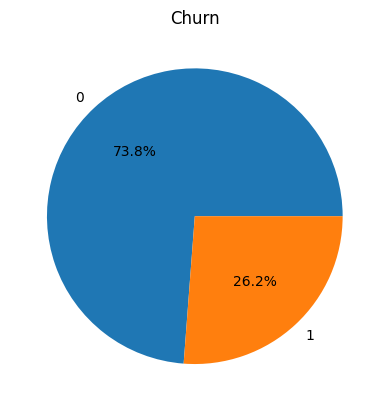

In [126]:
distr = df_train[target_col].value_counts()
plt.pie(distr.values, labels=distr.keys(), autopct='%1.1f%%')
plt.title(target_col)
plt.show()

Присутствует дизбаланс классов, но это терпимо. Можно попробовать добавить веса классам или сделать ребаланс.

Посмотрим еще на корелляцию всех признаков. Для этого надо категориальные фичи заменить на численные, например, просто закодировав категории в каждом столбце. Может показаться, что порядок категорий создаст какую-то дополнительную зависимость, но вроде это не так, если подумать.

In [127]:
misc = df_train[num_cols]
for i, col in enumerate(cat_cols, start=len(num_cols)):
    misc.insert(i, col, df_train[col].astype('category').cat.codes)

misc.corr().style.map(lambda x: 'background-color:rgb' + str(tuple((np.array([100, 100, 100]) + (x * np.array([0, 155, 0]) if x > 0 else x * np.array([-155, 0, 0]))).astype('int'))))

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
ClientPeriod,1.000000,0.249414,0.826658,0.006370,0.011561,0.370314,0.146120,0.013291,0.344992,-0.031391,0.334275,0.373151,0.375902,0.321828,0.285393,0.305789,0.672612,0.008711,-0.353928
MonthlySpending,0.249414,1.000000,0.652014,-0.011778,0.215456,0.087652,-0.125682,0.251283,0.427170,-0.319669,-0.052741,0.122113,0.167464,-0.012343,0.344368,0.342655,-0.070987,0.344868,-0.192028
TotalSpent,0.826658,0.652014,1.000000,0.006341,0.094640,0.308733,0.047241,0.116437,0.450779,-0.176239,0.261183,0.375724,0.393058,0.273357,0.390890,0.406866,0.449672,0.157007,-0.324325
Sex,0.006370,-0.011778,0.006341,1.000000,0.013207,0.002780,0.014605,-0.007771,-0.000722,0.004759,-0.010827,-0.005213,0.000347,-0.014350,-0.013835,-0.007032,-0.006185,-0.015698,0.015102
IsSeniorCitizen,0.011561,0.215456,0.094640,0.013207,1.000000,0.016764,-0.217007,0.008763,0.138341,-0.035115,-0.123305,-0.010950,-0.032548,-0.143931,0.031011,0.052190,-0.145131,0.151964,-0.041062
HasPartner,0.370314,0.087652,0.308733,0.002780,0.016764,1.000000,0.442530,0.001508,0.139554,0.000265,0.153188,0.146859,0.167990,0.130299,0.130824,0.131858,0.292764,-0.005293,-0.153509
HasChild,0.146120,-0.125682,0.047241,0.014605,-0.217007,0.442530,1.000000,-0.010475,-0.028929,0.052234,0.157814,0.088882,0.075208,0.133400,0.044780,0.032252,0.238125,-0.100777,-0.032327
HasPhoneService,0.013291,0.251283,0.116437,-0.007771,0.008763,0.001508,-0.010475,1.000000,-0.017241,0.393554,-0.020510,0.032771,0.008922,-0.026696,0.054057,0.052298,0.004736,0.021362,-0.012874
HasMultiplePhoneNumbers,0.344992,0.427170,0.450779,-0.000722,0.138341,0.139554,-0.028929,-0.017241,1.000000,-0.106551,0.021904,0.119862,0.126918,0.007708,0.175284,0.178832,0.115848,0.159336,-0.177053
HasInternetService,-0.031391,-0.319669,-0.176239,0.004759,-0.035115,0.000265,0.052234,0.393554,-0.106551,1.000000,-0.034393,0.039996,0.042815,-0.032575,0.113617,0.098057,0.100173,-0.129665,0.084306


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [128]:
X = pd.concat([df_train[num_cols], pd.get_dummies(df_train[cat_cols])], axis=1).to_numpy()
y = df_train[target_col].to_numpy()

In [113]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [130]:
scaler = StandardScaler()
X = scaler.fit_transform(X, y)

In [133]:
grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001]
}

search = GridSearchCV(LogisticRegression(), grid, scoring='roc_auc', n_jobs=-1, refit=True, cv=5)
search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [142]:
roc_auc_score(y, search.best_estimator_.predict_proba(X)[:, 1])

0.849051184541057

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.